In [1]:
# Data science imports
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Move these downloads to a setup script later
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CROMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CROMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CROMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def preprocess_text(raw_text):
    """
    Cleans and preprocesses raw text data
    Had to add some extra cleaning steps because of weird UTF-8 issues
    """
    # Convert everything to lowercase first
    text = raw_text.lower().strip()
    
    # Remove special chars and numbers - might need to tweak this regex later
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    word_list = text.split()
    
    # Initialize lemmatizer - this is slow but works better than stemming
    lemm = WordNetLemmatizer()
    
    # Get stopwords but keep negative words
    stops = set(stopwords.words('english'))
    stops.remove('not')  # Keep negations for sentiment analysis
    
    # Process words - this could probably be optimized
    processed_words = []
    for w in word_list:
        if w not in stops:  # Skip stopwords
            processed_words.append(lemm.lemmatize(w))
    
    return ' '.join(processed_words)


In [3]:
def create_sentiment_model(vocab_size, embedding_dim, max_length):
    """
    Creates a basic sentiment analysis model
    Note: Might need to adjust layer sizes based on dataset
    """
    model = Sequential()
    
    # Embedding layer - converts words to vectors
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(GlobalMaxPooling1D())
    
    # Hidden layers with dropout
    model.add(Dense(128, activation='relu'))  # First hidden layer
    model.add(Dropout(0.5))  # Aggressive dropout to prevent overfitting
    
    model.add(Dense(64, activation='relu'))   # Second layer
    model.add(Dropout(0.3))
    
    # Added this layer to help with complex patterns
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    
    # Binary classification output
    model.add(Dense(1, activation='sigmoid'))
    
    # Using adam optimizer - might experiment with learning rates
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model


In [4]:
def visualize_training(hist):
    # Create figure with two subplots
    fig, (acc_plot, loss_plot) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy subplot
    acc_plot.plot(hist.history['accuracy'], label='Train')
    acc_plot.plot(hist.history['val_accuracy'], label='Validation')
    acc_plot.set_title('Model Accuracy Over Time')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.set_xlabel('Epoch')
    acc_plot.legend()
    
    # Loss subplot
    loss_plot.plot(hist.history['loss'], label='Train')
    loss_plot.plot(hist.history['val_loss'], label='Validation')
    loss_plot.set_title('Model Loss Over Time')
    loss_plot.set_ylabel('Loss')
    loss_plot.set_xlabel('Epoch')
    loss_plot.legend()
    
    plt.tight_layout()
    plt.show()


Loading restaurant review data...
Preprocessing reviews...
Tokenizing text...
Creating model...
Training model...
Epoch 1/10


C:\Users\CROMA\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5025 - loss: 0.6929 - val_accuracy: 0.4563 - val_loss: 0.6939
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5304 - loss: 0.6908 - val_accuracy: 0.4563 - val_loss: 0.6966
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5345 - loss: 0.6901 - val_accuracy: 0.4625 - val_loss: 0.6915
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6015 - loss: 0.6816 - val_accuracy: 0.5312 - val_loss: 0.6844
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6692 - loss: 0.6590 - val_accuracy: 0.6750 - val_loss: 0.6457
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.5533 - val_accuracy: 0.7375 - val_loss: 0.5564
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9320 - loss: 0.2970 - val_accuracy: 0.7563 - val_loss: 0.5694
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - loss: 0.1451 - val_accuracy: 0.7688 - val_loss: 0.5860
Ep

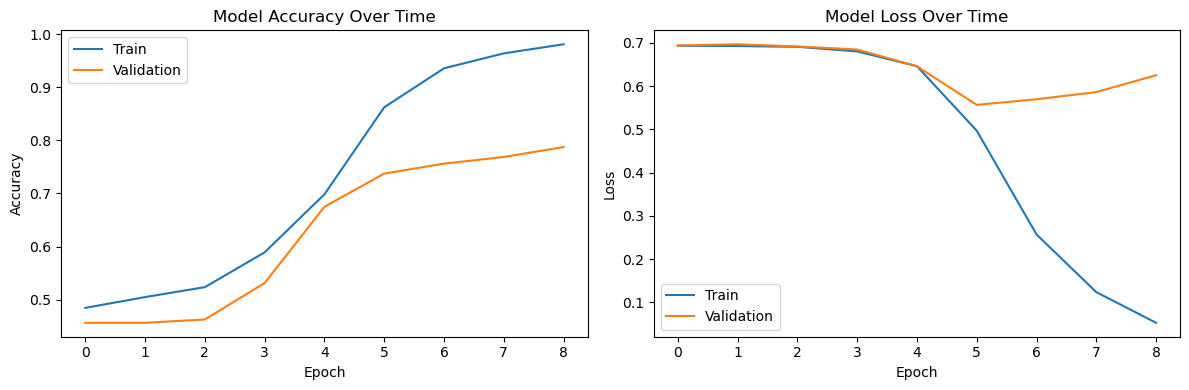


Evaluating model performance...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Test Accuracy: 68.50%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        96
           1       0.72      0.65      0.68       104

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



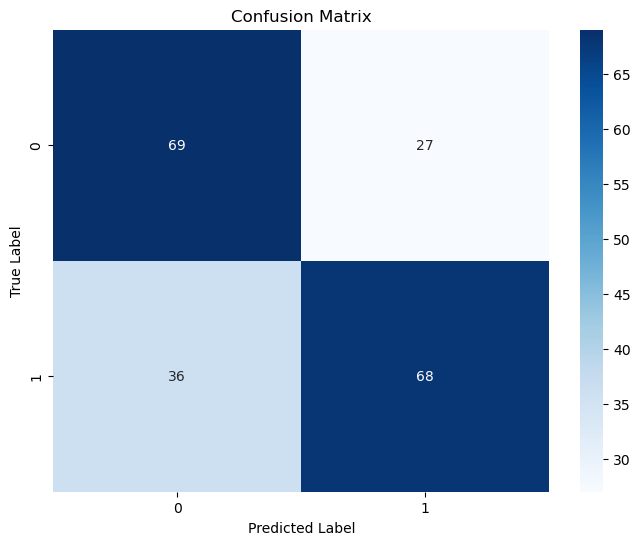

In [5]:
def show_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

if __name__ == "__main__":
    # Model hyperparameters - might need tuning
    VOCAB_SIZE = 5000  
    MAX_SEQ_LENGTH = 100  
    EMBED_SIZE = 16     
    BATCH_SIZE = 32    # Seems to work well on most GPUs
    NUM_EPOCHS = 10    
    
    # Load data
    print("Loading restaurant review data...")
    df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
    
    # Preprocess reviews
    print("Preprocessing reviews...")
    df['processed_text'] = df['Review'].apply(preprocess_text)
    
    # Tokenization
    print("Tokenizing text...")
    tok = Tokenizer(num_words=VOCAB_SIZE)
    tok.fit_on_texts(df['processed_text'])
    
    # Convert to sequences
    sequences = tok.texts_to_sequences(df['processed_text'])
    X = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH)
    y = df['Liked'].values
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42  # Using 42 as seed for reproducibility
    )
    
    # Initialize model
    print("Creating model...")
    sentiment_model = create_sentiment_model(VOCAB_SIZE, EMBED_SIZE, MAX_SEQ_LENGTH)
    
    # Early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,  # Wait 3 epochs before stopping
        restore_best_weights=True
    )
    
    # Train model
    print("Training model...")
    training_history = sentiment_model.fit(
        X_train, 
        y_train,
        epochs=NUM_EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.2,
        callbacks=[early_stopping]
    )
    
    # Show training progress
    visualize_training(training_history)
    
    # Evaluate model
    print("\nEvaluating model performance...")
    y_pred = (sentiment_model.predict(X_test) > 0.5).astype(int)
    
    # Print metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy: {acc:.2%}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Show confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    show_confusion_matrix(conf_mat)
    
    # Quick sentiment checker function
    def predict_sentiment(review):
        """Quick helper function to test new reviews"""
        clean = preprocess_text(review)
        seq = tok.texts_to_sequences([clean])
        padded = pad_sequences(seq, maxlen=MAX_SEQ_LENGTH)
        prediction = sentiment_model.predict(padded)[0][0]
        
        confidence = prediction if prediction > 0.5 else (1 - prediction)
        sentiment = "Positive" if prediction > 0.5 else "Negative"
        return f"{sentiment} ({confidence:.1%} confident)"
    
   

In [ ]:
# Test some example reviews
review =input("\nEnter Your review here: ")
sentiment = predict_sentiment(review)
print(f"Review: {review}")
print(f"Sentiment: {sentiment}\n")